In [3]:
import pandas
import altair
import numpy
altair.enable_mime_rendering()

In [ ]:
df = pandas.DataFrame(index=pandas.interval_range(start=0, end=100, freq=10, closed="left"), columns=["sumw", "another"])
df.sumw = [0, 12, 40, 125, 266, 1032, 377, 185, 21, 5]
df.another = numpy.arange(10) * 10

In [ ]:
df

In [ ]:
def plothist(df, level=0):
    ascolumn = df.reset_index(level=level)
    lastrow = ascolumn.iloc[[-1]].copy()
    ascolumn["index"] = ascolumn["index"].apply(lambda x: x.left)
    lastrow["index"] = lastrow["index"].apply(lambda x: x.right)
    ascolumn = pandas.concat([ascolumn, lastrow])

    out = altair.LayeredChart(ascolumn)
    out += altair.Chart().mark_line(interpolate="step-before").encode(x="index", y="sumw")
    out += altair.Chart().mark_line(interpolate="step-before").encode(x="index", y="another")
    return out

In [ ]:
plothist(df)

In [1]:
from altair import Chart, LayeredChart
import pandas as pd
import numpy as np

x = np.arange(50.)
data = pd.DataFrame({'x': x, 'y': np.sin(x / 5)})

chart = LayeredChart(data)

chart += Chart().mark_line().encode(x='x', y='y')
chart += Chart().mark_circle().encode(x='x', y='y')

chart

AttributeError: 'LayeredChart' object has no attribute 'encoding'

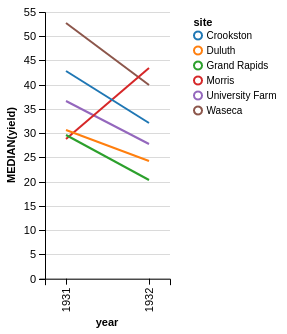

In [6]:
from altair import *

Chart('https://vega.github.io/vega-lite/data/barley.json',
    description='Slope graph showing the change in yield for different barley sites. It shows the error in the year labels for the Morris site.',
).mark_line().encode(
    color='site:N',
    x=X('year:O',
        scale=Scale(
            bandSize=50.0,
            padding=0.5,
        ),
    ),
    y='median(yield):Q',
)

In [9]:
df = pandas.DataFrame(
    index=pandas.MultiIndex.from_product([["a", "b"], ["x", "y", "z"]]),
    columns=["data"])
df

data
a x  NaN
  y  NaN
  z  NaN
b x  NaN
  y  NaN
  z  NaN

In [15]:
df.reindex(df.index.swaplevel(0, 1)).sort_index()

data
x a  NaN
  b  NaN
y a  NaN
  b  NaN
z a  NaN
  b  NaN